In [2]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.Collecting torchvision
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 325.1 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.6 MB 325.1 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.6 MB 325.1 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.6 MB 233.8 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.6 MB 245.8 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.6 MB 245.8 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.6 MB 249.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.6 MB 249.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.6 MB 249.8 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.6 MB 204.8 kB/s eta 0:


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import torch
import torchvision.transforms as T
import torchvision
from PIL import Image, ImageDraw
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import matplotlib.pyplot as plt

In [4]:
def load_model():
    """Load a pre-trained Faster R-CNN model."""
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    return model

In [5]:
def get_dataset():
    """Load a dataset from torchvision datasets."""
    dataset = torchvision.datasets.CocoDetection(root="/path/to/coco/root", annFile="/path/to/coco/annotations.json", transform=T.ToTensor())
    return dataset


In [6]:
def preprocess_image(image):
    """Preprocess an image from the dataset."""
    transform = T.Compose([
        T.ToTensor()
    ])
    return transform(image).unsqueeze(0), image

In [7]:
def predict(model, image_tensor, confidence_threshold=0.5):
    """Run inference and return predictions."""
    with torch.no_grad():
        predictions = model(image_tensor)[0]
    
    boxes, labels, scores = predictions['boxes'], predictions['labels'], predictions['scores']
    
    # Filter predictions by confidence threshold
    valid_indices = scores >= confidence_threshold
    return boxes[valid_indices], labels[valid_indices], scores[valid_indices]

In [8]:
def draw_predictions(image, boxes, labels, scores):
    """Draw bounding boxes and labels on the image."""
    draw = ImageDraw.Draw(image)
    
    for box, label, score in zip(boxes, labels, scores):
        box = box.tolist()
        draw.rectangle(box, outline="red", width=3)
        draw.text((box[0], box[1]), f"{label}: {score:.2f}", fill="red")
    
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    

In [9]:
def main():
    model = load_model()
    dataset = get_dataset()
    image, _ = dataset[0]  # Get first image from dataset
    image_tensor, original_image = preprocess_image(image)
    boxes, labels, scores = predict(model, image_tensor)
    draw_predictions(original_image, boxes, labels, scores)

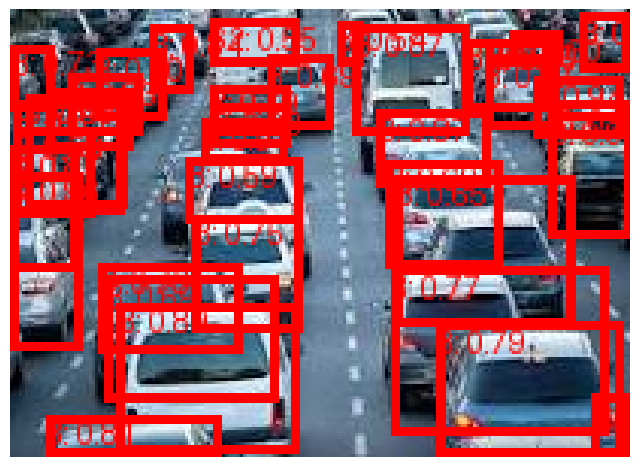

In [12]:
from PIL import Image

# Load an image to test the model (replace with a valid path)
image_path = "traffic image.jpg"
image = Image.open(image_path)

# Preprocess the image
image_tensor, original_image = preprocess_image(image)

# Load model and get predictions
model = load_model()
boxes, labels, scores = predict(model, image_tensor)

# Define COCO class labels
coco_labels = [
    "N/A", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant",
    "N/A", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
    # (add more class names as required from the COCO dataset)
]

# Draw predictions on the image
draw_predictions(original_image, boxes, labels, scores)
